# Reference: https://github.com/makama-md/AI-for-Medical-Diagnosis/blob/master/week_3/C1M3_Assignment.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import sys
from PIL import Image
import random
import pandas as pd
import glob

import keras
import json
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K 
import util

In [2]:
# set home directory and data directory
HOME_DIR = "/Users/jiehyun/Downloads/Task01_BrainTumour/"
DATA_DIR = HOME_DIR

def load_case(image_nifty_file, label_nifty_file):
    # load the image and label file, get the image content and return a numpy array for each
    image = np.array(nib.load(image_nifty_file).get_fdata())
    label = np.array(nib.load(label_nifty_file).get_fdata())
    
    return image, label

(240, 240, 155, 4) (240, 240, 155)


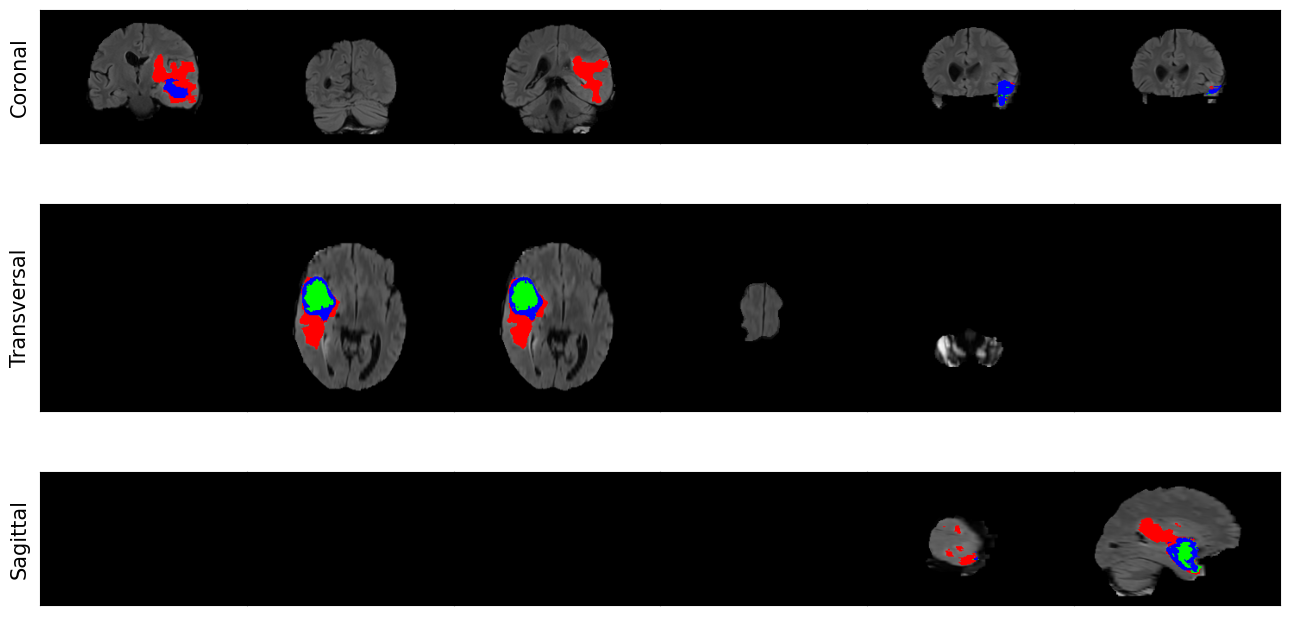

In [3]:
#visualize images with labels
image, label = load_case(DATA_DIR + "imagesTr/BRATS_001.nii.gz", DATA_DIR + "labelsTr/BRATS_001.nii.gz")
print(image.shape, label.shape)
image = util.get_labeled_image(image, label)

util.plot_image_grid(image)

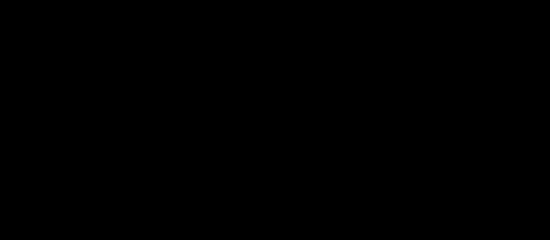

In [4]:
#visualize image with labels as gif
image, label = load_case(DATA_DIR + "imagesTr/BRATS_001.nii.gz", DATA_DIR + "labelsTr/BRATS_001.nii.gz")
util.visualize_data_gif(util.get_labeled_image(image, label))

In [5]:
print(image.max(), label.max())

2239.0 3.0


In [6]:
x = np.asarray(image,dtype=np.float32)/2239
y = np.asarray(label,dtype=np.float32)/3

In [7]:
print(x. max(), y.max())

1.0 1.0


In [8]:
print(x.shape, y.shape)

(240, 240, 155, 4) (240, 240, 155)


In [9]:
x = x.reshape(x.shape[2], x.shape[0], x.shape[1], x.shape[3])
y = y.reshape(y.shape[2], y.shape[0], y.shape[1], 1)
print(x.shape, y.shape)

(155, 240, 240, 4) (155, 240, 240, 1)


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.145, random_state=0)

print("x_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

x_train:  (132, 240, 240, 4)
y_train:  (132, 240, 240, 1)
x_val:  (23, 240, 240, 4)
y_val:  (23, 240, 240, 1)


In [11]:
from keras_unet.utils import get_augmented

train_gen = get_augmented(
    x_train, y_train, batch_size=2,
    data_gen_args = dict(
        rotation_range=5.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=40,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='constant'
    ))

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


/opt/homebrew/lib/python3.10/site-packages/keras/preprocessing/image.py:2094: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (132, 240, 240, 4) (240 channels).
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/keras/preprocessing/image.py:2094: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (132, 240, 240, 1) (240 channels).
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape 

In [12]:
sample_batch = next(train_gen)
xx, yy = sample_batch
print(xx.shape, yy.shape)

(2, 240, 240, 4) (2, 240, 240, 1)


In [14]:
from util import unet_model_3d, soft_dice_loss


model = unet_model_3d(soft_dice_loss, input_shape=(4, 160, 160, 16),
                  pool_size=(2, 2, 2), n_labels=3,
                  initial_learning_rate=0.00001,
                  deconvolution=False, depth=4, n_base_filters=32,
                  include_label_wise_dice_coefficients=False, metrics=[],
                  batch_normalization=False, activation_name="sigmoid")

AttributeError: 'KerasTensor' object has no attribute '_keras_shape'